In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
for i in range(1,6):
    print(i)


1
2
3
4
5


In [3]:
using_df = pd.read_csv("../input/서울특별시 공공자전거 이용정보(시간대별)_2017년_1.csv", engine='python')
for i in range(1,6):
    temp = pd.read_csv(f"../input/서울특별시 공공자전거 이용정보(시간대별)_2017년_{i+1}.csv", engine='python')
    using_df = pd.concat([using_df,temp])
using_df = using_df.reset_index()
del using_df['index']
for i in using_df.columns:
    using_df = using_df.rename(columns={i:i.replace("'","")})
using_df.head()

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,'2017-01-01','00','230',' 영등포구청역 1번출구','정기','F','~10대',1,31.27,0.39,1680,155
1,'2017-01-01','00','315',' 신한은행 안국역지점 옆','정기','F','20대',1,47.32,0.55,2390,15
2,'2017-01-01','00','328',' 탑골공원 앞','정기','F','20대',1,57.92,0.52,2250,13
3,'2017-01-01','00','175',' 홍연2교옆','정기','F','20대',1,133.29,1.53,6600,43
4,'2017-01-01','00','817',' 삼각지역 4번출구 앞','정기','F','20대',1,33.88,0.32,1380,8


In [4]:
using_df['대여일자'] = using_df['대여일자'].apply(lambda x: x.replace("'",""))
using_df['대여시간'] = using_df['대여시간'].apply(lambda x: x.replace("'",""))
using_df['대여소번호'] = using_df['대여소번호'].apply(lambda x: str(x).replace("'",""))
using_df['대여구분코드'] = using_df['대여구분코드'].apply(lambda x: x.replace("'",""))
using_df['연령대코드'] = using_df['연령대코드'].apply(lambda x: str(x).replace("'",""))
using_df['대여소'] = using_df['대여소'].apply(lambda x: str(x).replace("'",""))
using_df.head()

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-01-01,00,230,영등포구청역 1번출구,정기,'F',~10대,1,31.27,0.39,1680,155
1,2017-01-01,00,315,신한은행 안국역지점 옆,정기,'F',20대,1,47.32,0.55,2390,15
2,2017-01-01,00,328,탑골공원 앞,정기,'F',20대,1,57.92,0.52,2250,13
3,2017-01-01,00,175,홍연2교옆,정기,'F',20대,1,133.29,1.53,6600,43
4,2017-01-01,00,817,삼각지역 4번출구 앞,정기,'F',20대,1,33.88,0.32,1380,8


In [5]:
using_df['대여소번호'].unique()

array(['230', '315', '328', ..., '953', '937', '938'], dtype=object)

In [6]:
using_df[(using_df['이동거리(M)'] == 0) |  (using_df['이동시간(분)'] == 0)]
print(using_df.shape)
print(using_df[(using_df['이동거리(M)'] == 0) | (using_df['이동시간(분)'] == 0)].shape)
using_df = using_df[(using_df['이동거리(M)'] != 0) &  (using_df['이동시간(분)'] != 0)]

(4196232, 12)
(115230, 12)


In [7]:
using_df.shape

(4081002, 12)

In [8]:
using_df['대여일자'] = pd.to_datetime(using_df["대여일자"])
    
using_df.head()

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-01-01,00,230,영등포구청역 1번출구,정기,'F',~10대,1,31.27,0.39,1680,155
1,2017-01-01,00,315,신한은행 안국역지점 옆,정기,'F',20대,1,47.32,0.55,2390,15
2,2017-01-01,00,328,탑골공원 앞,정기,'F',20대,1,57.92,0.52,2250,13
3,2017-01-01,00,175,홍연2교옆,정기,'F',20대,1,133.29,1.53,6600,43
4,2017-01-01,00,817,삼각지역 4번출구 앞,정기,'F',20대,1,33.88,0.32,1380,8


In [9]:
using_df["이동거리(M)"].describe().apply(lambda x: int(x))

count    4081002
mean        4464
std         6058
min           10
25%         1340
50%         2600
75%         5430
max       569370
Name: 이동거리(M), dtype: int64

In [10]:
def distancemean(x,y):
    return x/y
using_df["인당 이동거리(M)"] = list(map(distancemean, using_df['이동거리(M)'] , using_df['이용건수']))


In [11]:
using_df["인당 이동거리(M)"].describe().apply(lambda x: int(x))

count    4081002
mean        3697
std         4622
min            2
25%         1240
50%         2310
75%         4590
max       255990
Name: 인당 이동거리(M), dtype: int64

In [12]:
using_df[using_df["인당 이동거리(M)"] < 5000]

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),인당 이동거리(M)
0,2017-01-01,00,230,영등포구청역 1번출구,정기,'F',~10대,1,31.27,0.39,1680,155,1680.000000
1,2017-01-01,00,315,신한은행 안국역지점 옆,정기,'F',20대,1,47.32,0.55,2390,15,2390.000000
2,2017-01-01,00,328,탑골공원 앞,정기,'F',20대,1,57.92,0.52,2250,13,2250.000000
4,2017-01-01,00,817,삼각지역 4번출구 앞,정기,'F',20대,1,33.88,0.32,1380,8,1380.000000
5,2017-01-01,00,906,연신내역 5번출구150M 아래,정기,'F',20대,1,31.24,0.37,1610,11,1610.000000
6,2017-01-01,00,927,연신내역 3번출구 인근,정기,'F',20대,1,113.69,0.77,3300,21,3300.000000
7,2017-01-01,00,307,서울역사박물관 앞,정기,'F',30대,2,109.93,1.05,4550,43,2275.000000
8,2017-01-01,00,327,낙원상가 옆,정기,'F',30대,1,56.63,0.51,2200,18,2200.000000
9,2017-01-01,00,335,종로3가역 15번출구 앞,정기,'F',30대,1,72.50,0.83,3590,24,3590.000000
10,2017-01-01,00,113,홍대입구역 2번출구 앞,정기,'F',30대,1,62.73,0.61,2640,16,2640.000000


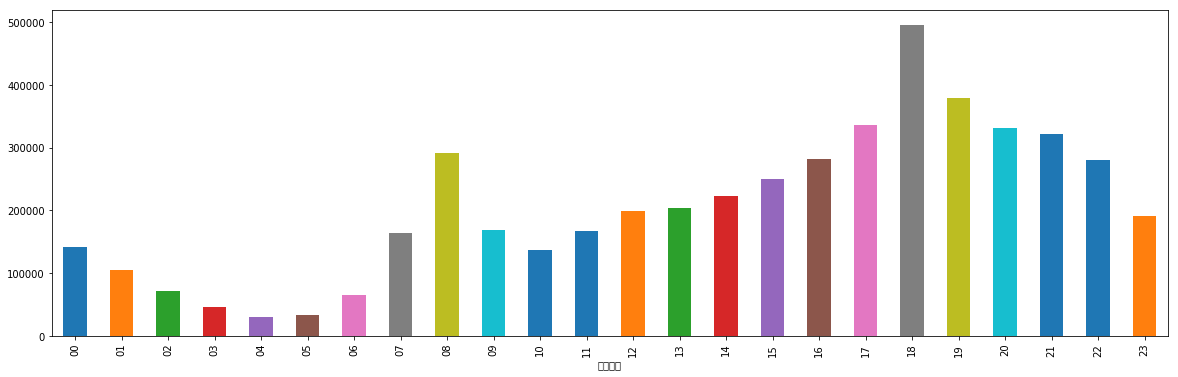

In [13]:
using_df.groupby("대여시간")["이용건수"].sum().plot(kind='bar', figsize=(20,6))

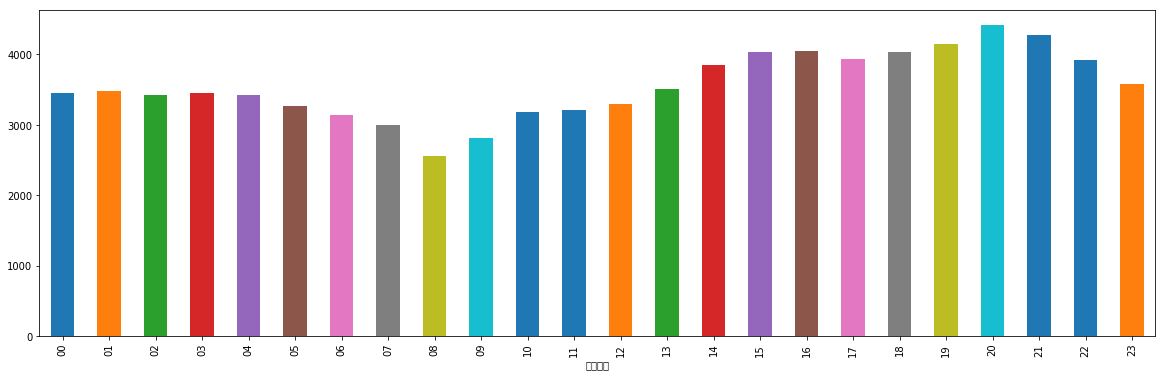

In [14]:
using_df.groupby("대여시간")["인당 이동거리(M)"].mean().plot(kind='bar', figsize=(20,6))

In [15]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
mpl.rcParams.update({'font.size': 20})

In [16]:
using_df["이용건수"].describe().apply(int)

count    4081002
mean           1
std            0
min            1
25%            1
50%            1
75%            1
max           86
Name: 이용건수, dtype: int64

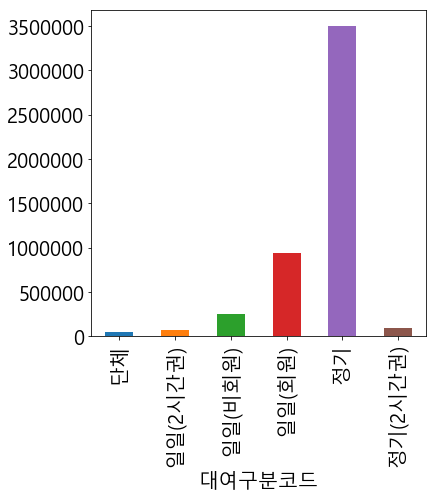

In [55]:
using_df.groupby("대여구분코드")["이용건수"].sum().plot(kind='bar', figsize=(6,6), legend=False)

In [18]:
using_df["주말"] = using_df["대여일자"].dt.weekday_name

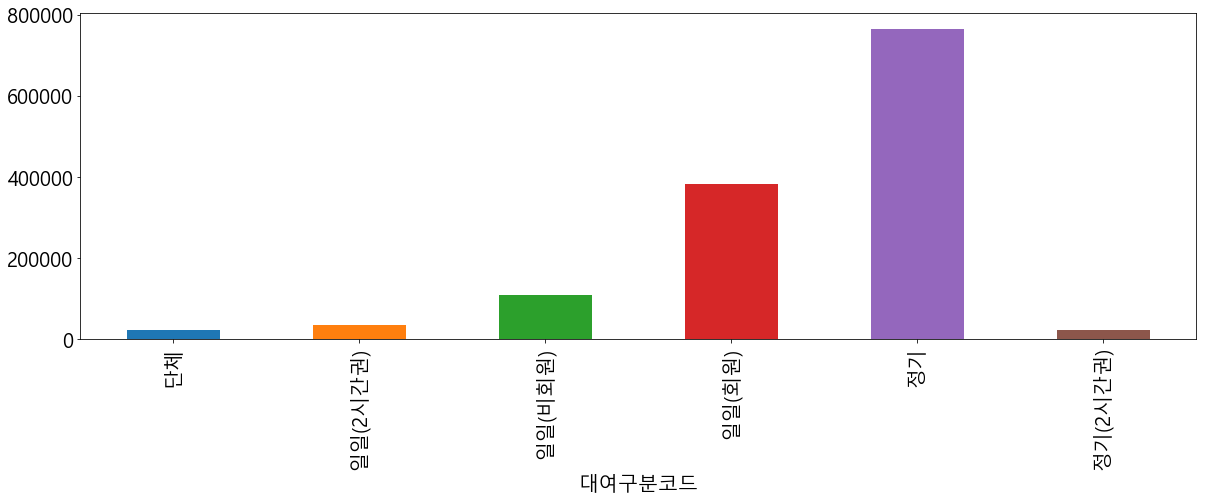

In [19]:
using_df[(using_df["주말"] == "Sunday") | (using_df["주말"] == "Saturday") ].groupby("대여구분코드")["이용건수"].sum().plot(kind='bar', figsize=(20,6))

In [20]:
jumal = using_df[(using_df["주말"] == "Sunday") | (using_df["주말"] == "Saturday") ].groupby("대여구분코드")["이용건수"].sum()/2
jumal = jumal.rename(columns={"이용건수" : "주말이용건수"})

In [21]:
pyeonil = using_df[(using_df["주말"] != "Sunday") & (using_df["주말"] != "Saturday") ].groupby("대여구분코드")["이용건수"].sum()/5

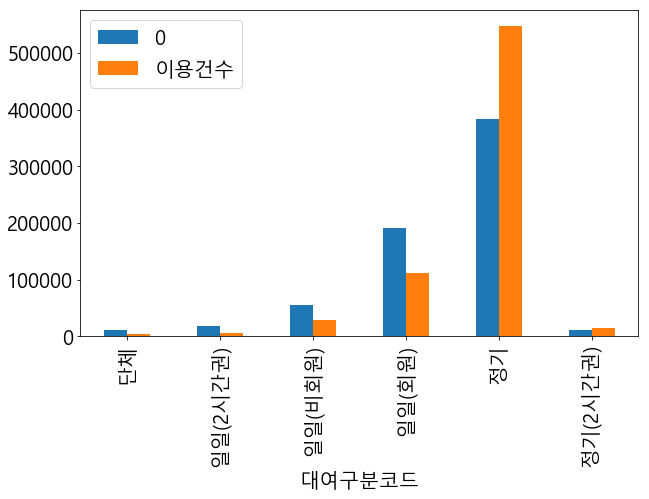

In [51]:
pd.concat([jumal, pyeonil], axis=1).plot(kind="bar", figsize=(10,6))

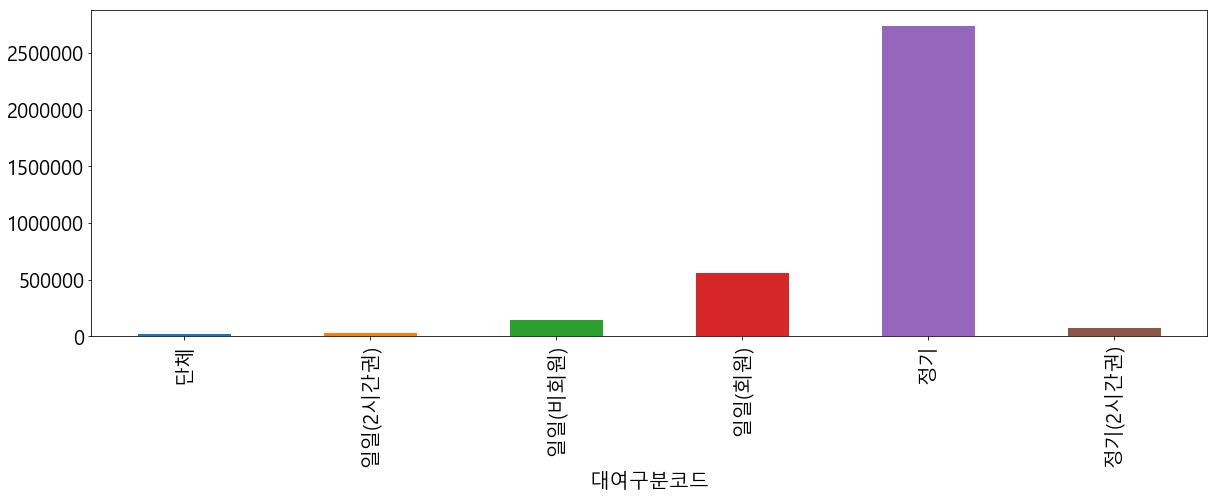

In [23]:
using_df[(using_df["주말"] != "Sunday") & (using_df["주말"] != "Saturday") ].groupby("대여구분코드")["이용건수"].sum().plot(kind='bar', figsize=(20,6))

In [24]:
using_df.head()

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),인당 이동거리(M),주말
0,2017-01-01,00,230,영등포구청역 1번출구,정기,'F',~10대,1,31.27,0.39,1680,155,1680.0,Sunday
1,2017-01-01,00,315,신한은행 안국역지점 옆,정기,'F',20대,1,47.32,0.55,2390,15,2390.0,Sunday
2,2017-01-01,00,328,탑골공원 앞,정기,'F',20대,1,57.92,0.52,2250,13,2250.0,Sunday
3,2017-01-01,00,175,홍연2교옆,정기,'F',20대,1,133.29,1.53,6600,43,6600.0,Sunday
4,2017-01-01,00,817,삼각지역 4번출구 앞,정기,'F',20대,1,33.88,0.32,1380,8,1380.0,Sunday


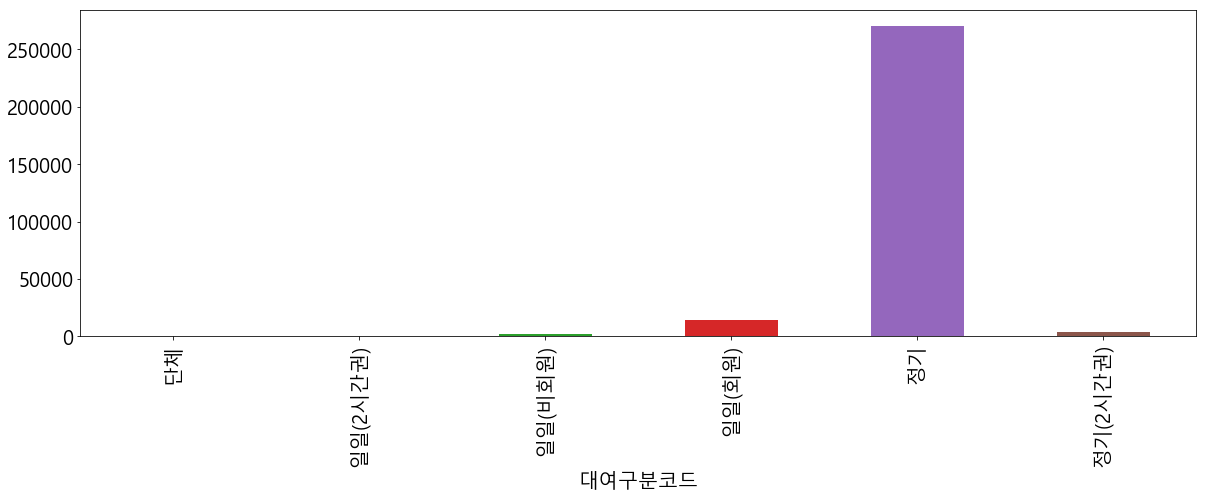

In [25]:
using_df[using_df["대여시간"] == '08'].groupby("대여구분코드")["이용건수"].sum().plot(kind='bar', figsize=(20,6))

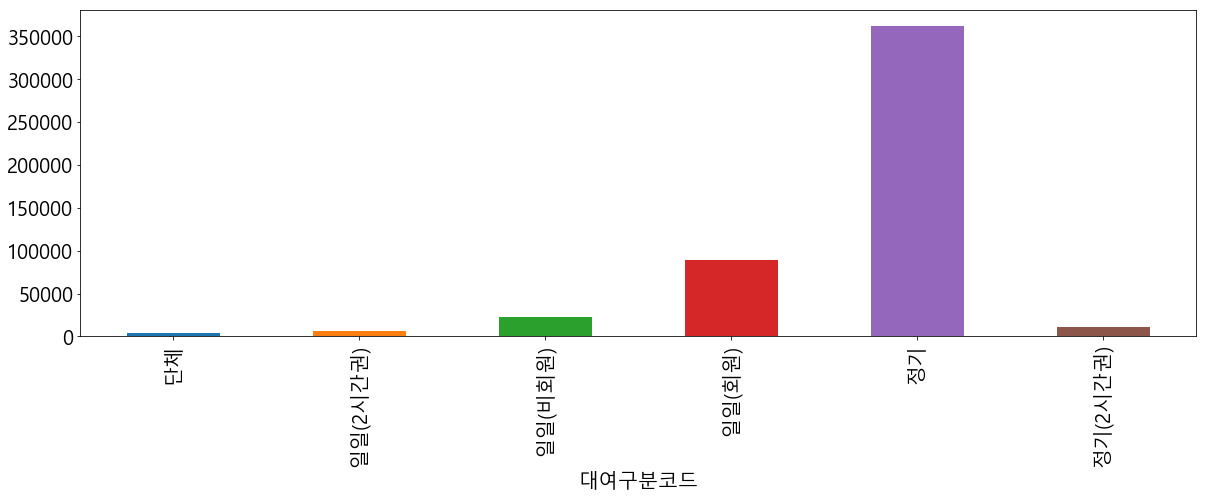

In [26]:
using_df[using_df["대여시간"] == '18'].groupby("대여구분코드")["이용건수"].sum().plot(kind='bar', figsize=(20,6))

In [27]:
work_df = using_df.copy()
work_df.head()

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),인당 이동거리(M),주말
0,2017-01-01,00,230,영등포구청역 1번출구,정기,'F',~10대,1,31.27,0.39,1680,155,1680.0,Sunday
1,2017-01-01,00,315,신한은행 안국역지점 옆,정기,'F',20대,1,47.32,0.55,2390,15,2390.0,Sunday
2,2017-01-01,00,328,탑골공원 앞,정기,'F',20대,1,57.92,0.52,2250,13,2250.0,Sunday
3,2017-01-01,00,175,홍연2교옆,정기,'F',20대,1,133.29,1.53,6600,43,6600.0,Sunday
4,2017-01-01,00,817,삼각지역 4번출구 앞,정기,'F',20대,1,33.88,0.32,1380,8,1380.0,Sunday


In [28]:
def findweekend(date):
    number = date.weekday()
    if number < 5:
        return False
    else:
        return True
    
work_df['weekend'] = work_df['대여일자'].apply(findweekend)

In [29]:
work_df[work_df['weekend'] == True]

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),인당 이동거리(M),주말,weekend
0,2017-01-01,00,230,영등포구청역 1번출구,정기,'F',~10대,1,31.27,0.39,1680,155,1680.000000,Sunday,True
1,2017-01-01,00,315,신한은행 안국역지점 옆,정기,'F',20대,1,47.32,0.55,2390,15,2390.000000,Sunday,True
2,2017-01-01,00,328,탑골공원 앞,정기,'F',20대,1,57.92,0.52,2250,13,2250.000000,Sunday,True
3,2017-01-01,00,175,홍연2교옆,정기,'F',20대,1,133.29,1.53,6600,43,6600.000000,Sunday,True
4,2017-01-01,00,817,삼각지역 4번출구 앞,정기,'F',20대,1,33.88,0.32,1380,8,1380.000000,Sunday,True
5,2017-01-01,00,906,연신내역 5번출구150M 아래,정기,'F',20대,1,31.24,0.37,1610,11,1610.000000,Sunday,True
6,2017-01-01,00,927,연신내역 3번출구 인근,정기,'F',20대,1,113.69,0.77,3300,21,3300.000000,Sunday,True
7,2017-01-01,00,307,서울역사박물관 앞,정기,'F',30대,2,109.93,1.05,4550,43,2275.000000,Sunday,True
8,2017-01-01,00,327,낙원상가 옆,정기,'F',30대,1,56.63,0.51,2200,18,2200.000000,Sunday,True
9,2017-01-01,00,335,종로3가역 15번출구 앞,정기,'F',30대,1,72.50,0.83,3590,24,3590.000000,Sunday,True


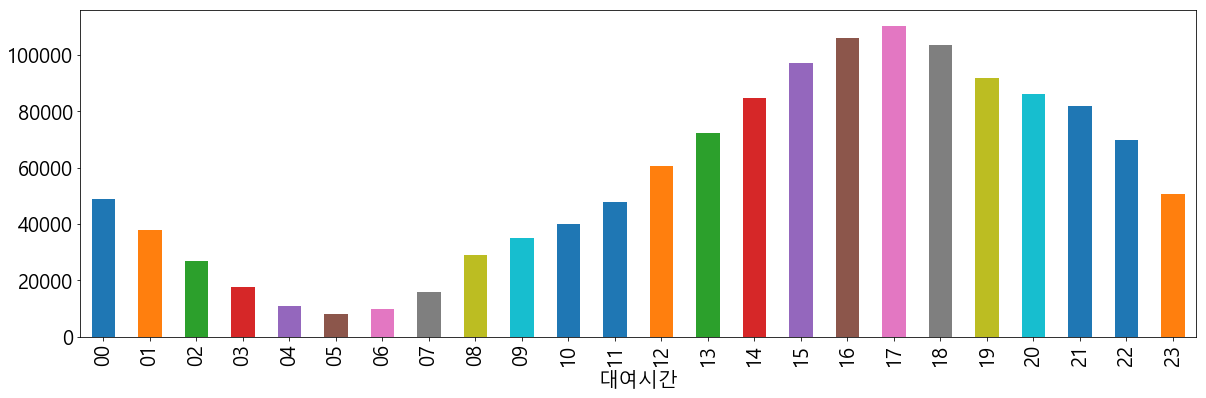

In [30]:
work_df[work_df['weekend'] == True].groupby("대여시간")["이용건수"].sum().plot(kind='bar', figsize=(20,6))

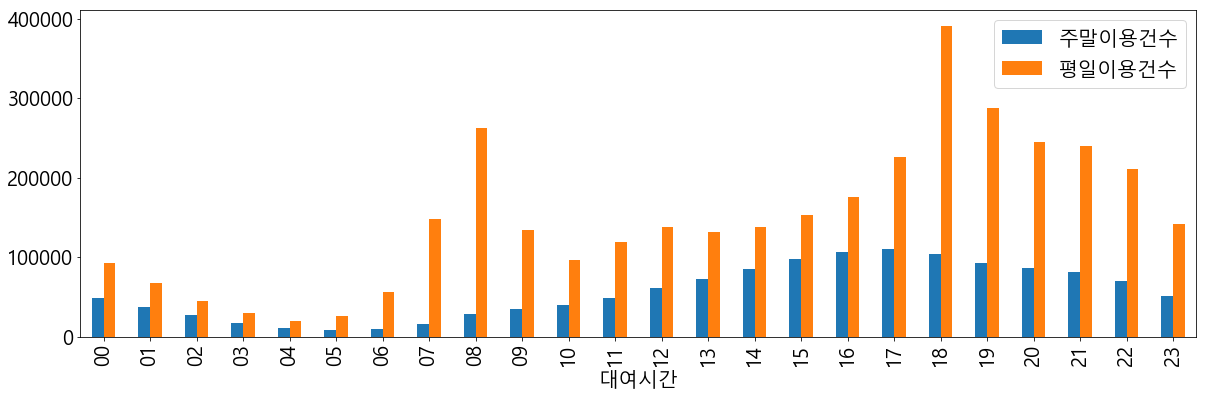

In [31]:
showing_df = work_df[work_df['weekend'] == True].groupby("대여시간")["이용건수"].sum().reset_index()
sh2 = work_df[work_df['weekend'] == False].groupby("대여시간")["이용건수"].sum().reset_index()
showing_df = showing_df.set_index('대여시간', inplace=False)
sh2 = sh2.set_index('대여시간', inplace=False)
showing_df = showing_df.rename(columns={"이용건수": "주말이용건수"})
sh2 = sh2.rename(columns={"이용건수": "평일이용건수"})
usage_timetable = pd.concat([showing_df,sh2], axis=1)
usage_timetable.plot(kind='bar', figsize=(20,6))

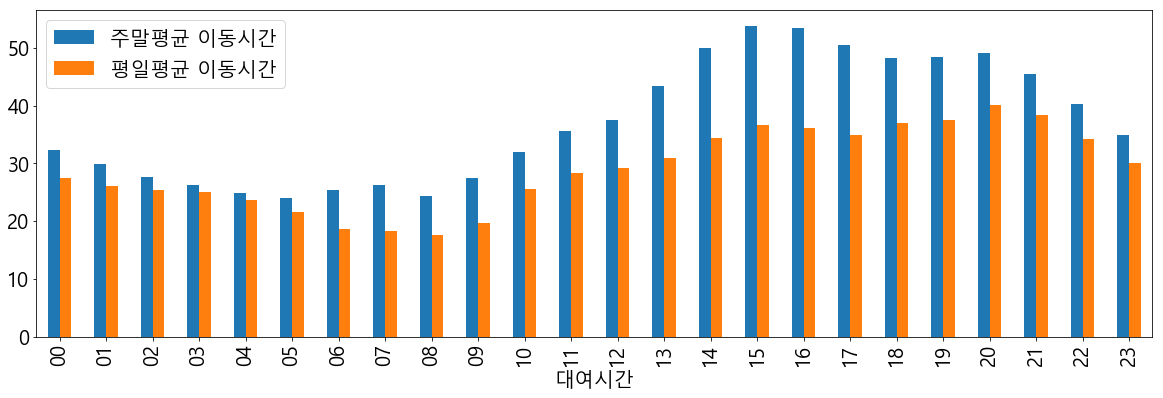

In [32]:
showing_df = work_df[work_df['weekend'] == True].groupby("대여시간")["이동시간(분)"].mean().reset_index()
sh2 = work_df[work_df['weekend'] == False].groupby("대여시간")["이동시간(분)"].mean().reset_index()
showing_df = showing_df.set_index('대여시간', inplace=False)
sh2 = sh2.set_index('대여시간', inplace=False)
showing_df = showing_df.rename(columns={"이동시간(분)": "주말평균 이동시간"})
sh2 = sh2.rename(columns={"이동시간(분)": "평일평균 이동시간"})
usage_timetable = pd.concat([showing_df,sh2], axis=1)
usage_timetable.plot(kind='bar', figsize=(20,6))

In [33]:
work_df

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),인당 이동거리(M),주말,weekend
0,2017-01-01,00,230,영등포구청역 1번출구,정기,'F',~10대,1,31.27,0.39,1680,155,1680.000000,Sunday,True
1,2017-01-01,00,315,신한은행 안국역지점 옆,정기,'F',20대,1,47.32,0.55,2390,15,2390.000000,Sunday,True
2,2017-01-01,00,328,탑골공원 앞,정기,'F',20대,1,57.92,0.52,2250,13,2250.000000,Sunday,True
3,2017-01-01,00,175,홍연2교옆,정기,'F',20대,1,133.29,1.53,6600,43,6600.000000,Sunday,True
4,2017-01-01,00,817,삼각지역 4번출구 앞,정기,'F',20대,1,33.88,0.32,1380,8,1380.000000,Sunday,True
5,2017-01-01,00,906,연신내역 5번출구150M 아래,정기,'F',20대,1,31.24,0.37,1610,11,1610.000000,Sunday,True
6,2017-01-01,00,927,연신내역 3번출구 인근,정기,'F',20대,1,113.69,0.77,3300,21,3300.000000,Sunday,True
7,2017-01-01,00,307,서울역사박물관 앞,정기,'F',30대,2,109.93,1.05,4550,43,2275.000000,Sunday,True
8,2017-01-01,00,327,낙원상가 옆,정기,'F',30대,1,56.63,0.51,2200,18,2200.000000,Sunday,True
9,2017-01-01,00,335,종로3가역 15번출구 앞,정기,'F',30대,1,72.50,0.83,3590,24,3590.000000,Sunday,True


In [34]:
gerchi = pd.read_excel("../input/공공자전거대여소정보_20180409.xlsx")

In [35]:
gerchi["대여소번호"] = gerchi["대여소번호"].apply(lambda x:str(x))

In [36]:
merged_work_df = work_df.merge(gerchi[["구","대여소번호"]], on="대여소번호", how='left')

In [37]:
merged_work_df[merged_work_df["구"].isnull() == True]["대여소번호"].unique()

array(['315', '554', '135', '260', '171', '350', '상암센터 정비실', '중랑센터',
       '위트콤', '중랑정비팀test 1005', '1315', '2114', '위트콤공장', '2332', '2217',
       '2027', '2349', '2139', '2012', '1261', '1266', 'nan', '2363'],
      dtype=object)

In [38]:
merged_work_df['연령대코드'].unique()

array(['~10대', '20대', '30대', '40대', '60대', '50대', '70대~', 'nan'],
      dtype=object)

In [39]:
def get_nai(code):
    if code == '~10대':
        return '10대'
    elif code == '20대':
        return '20대'
    elif code == '30대':
        return '30대'
    elif code == '40대':
        return '40대'
    elif code == 'nan':
        return '판단불가'
    else:
        return '40대 초과'
    
merged_work_df['Easynai'] = list(map(get_nai, merged_work_df['연령대코드']))

In [40]:
merged_work_df.groupby("Easynai")["이용건수"].sum()

Easynai
10대        122910
20대       2288438
30대       1233536
40대        697857
40대 초과     382727
판단불가       188914
Name: 이용건수, dtype: int64

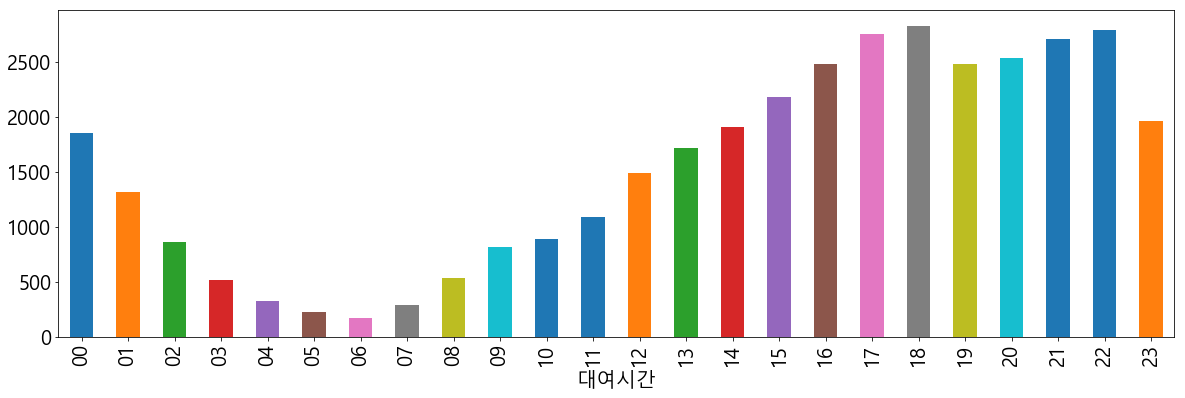

In [41]:
showing_df = merged_work_df[(merged_work_df['Easynai'] == '10대') & (merged_work_df['weekend'] == True)].groupby("대여시간")["이용건수"].sum().plot(kind='bar', figsize=(20,6))

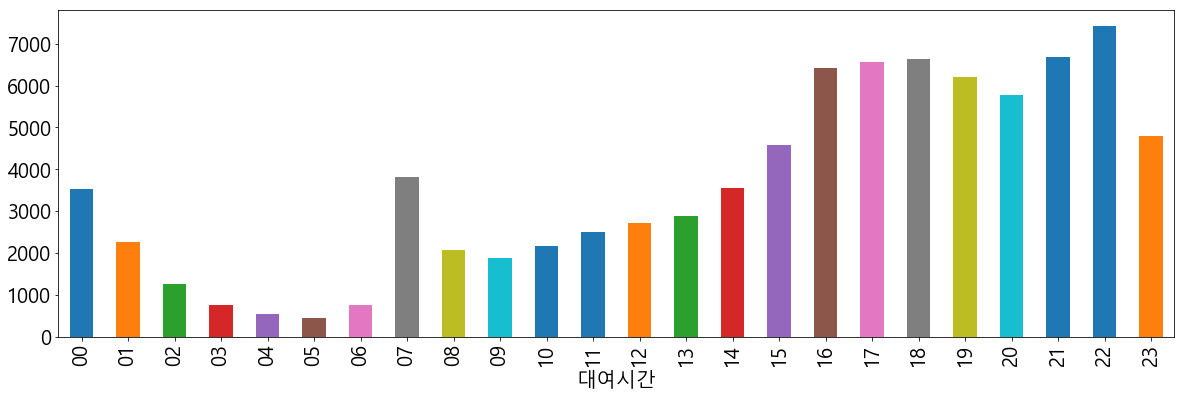

In [42]:
showing_df = merged_work_df[(merged_work_df['Easynai'] == '10대') & (merged_work_df['weekend'] == False)].groupby("대여시간")["이용건수"].sum().plot(kind='bar', figsize=(20,6))

In [44]:
merged_work_df[merged_work_df["구"] == '성동구'].groupby("대여소")["이용건수"].sum().reset_index().sort_values(by='이용건수', ascending=False)

,대여소,이용건수
20,서울숲역 4번 출구 옆,18432
51,한양대병원사거리,17801
34,옥수역 3번출구,15871
29,성수역 2번출구 앞,14873
10,뚝섬역 1번 출구 옆,14485
50,청계천 생태교실 앞,13999
44,이마트 버스정류소 옆,13995
47,청계8가사거리 부근,13483
26,성수사거리 버스정류장 앞,12668
37,왕십리역 4번 출구 건너편,11084


In [45]:
merged_work_df.head()

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),인당 이동거리(M),주말,weekend,구,Easynai
0,2017-01-01,00,230,영등포구청역 1번출구,정기,'F',~10대,1,31.27,0.39,1680,155,1680.0,Sunday,True,영등포구,10대
1,2017-01-01,00,315,신한은행 안국역지점 옆,정기,'F',20대,1,47.32,0.55,2390,15,2390.0,Sunday,True,NaN,20대
2,2017-01-01,00,328,탑골공원 앞,정기,'F',20대,1,57.92,0.52,2250,13,2250.0,Sunday,True,종로구,20대
3,2017-01-01,00,175,홍연2교옆,정기,'F',20대,1,133.29,1.53,6600,43,6600.0,Sunday,True,서대문구,20대
4,2017-01-01,00,817,삼각지역 4번출구 앞,정기,'F',20대,1,33.88,0.32,1380,8,1380.0,Sunday,True,용산구,20대


In [46]:
bygender = work_df.groupby('성별').count()["대여일자"].reset_index()
bygender.head()

,성별,대여일자
0,'',115695
1,'F',1517731
2,'M',2447576


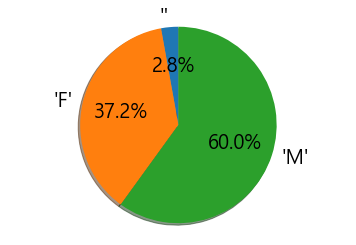

In [48]:
sizes = bygender["대여일자"]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=bygender['성별'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [58]:
bynai = work_df.groupby('연령대코드')["대여일자"].count().reset_index()
bynai

,연령대코드,대여일자
0,20대,1812772
1,30대,1044647
2,40대,615708
3,50대,262132
4,60대,70596
5,70대~,33364
6,nan,130939
7,~10대,110844


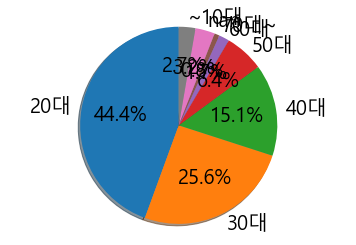

In [57]:
sizes = bynai["대여일자"]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=bynai['연령대코드'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

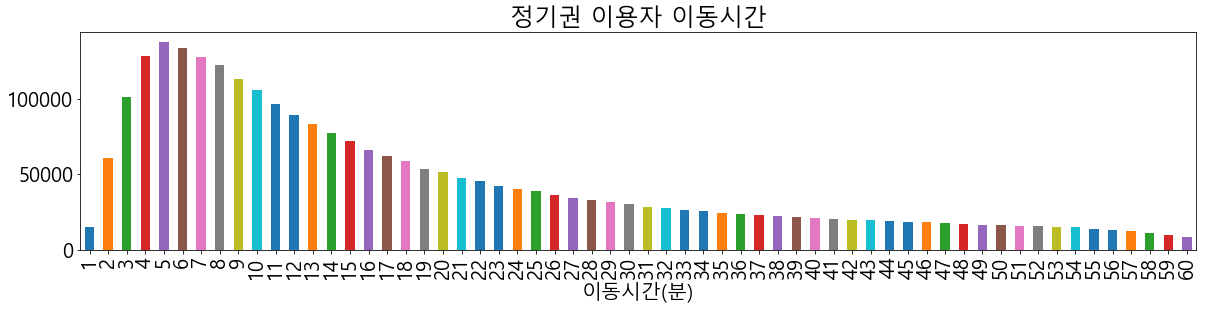

In [122]:
using_df[(using_df['대여구분코드'] == '정기') & (using_df['이동시간(분)'] <= 60) ].groupby('이동시간(분)')['이동거리(M)'].count().plot(kind="bar", figsize=(20,4), title="정기권 이용자 이동시간")

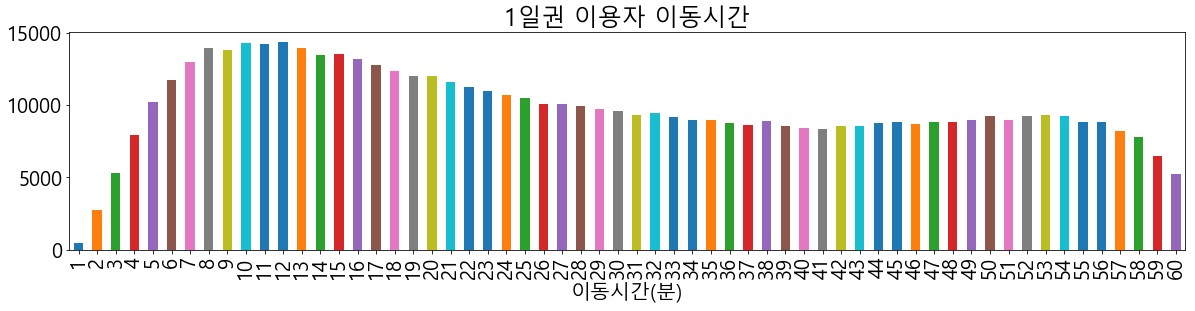

In [123]:
using_df[(using_df['대여구분코드'] == '일일(회원)') & (using_df['이동시간(분)'] <= 60) ].groupby('이동시간(분)')['이동거리(M)'].count().plot(kind="bar", figsize=(20,4), title="1일권 이용자 이동시간")

In [100]:
using_df['대여구분코드'].unique()

array(['정기', '일일(회원)', '일일(비회원)', '단체', '일일(2시간권)', '정기(2시간권)'],
      dtype=object)

In [130]:
a = using_df[(using_df['대여구분코드'] == '정기')].shape
b = using_df[(using_df['대여구분코드'] == '정기') & (using_df['이동시간(분)'] <= 15)].shape

In [131]:
b[0] / a[0] * 100

49.91878812550332